        Gordon1976: http://adsabs.harvard.edu/abs/1976ApJ...208..346G

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
Daten =[[2,2.5,0.13,0.49,0.81], #Index 1 = Spalte (R)
[2.5,3,0.14,0.41,0.69], # Index 2 = Komponente Ri,Ra,HI,CO,H2
[3,3.5,0.16,0.38,0.63],
[3.5,4,0.19,0.39,0.65],
[4,4.5,0.25,0.87,1.45],
[4.5,5,0.3,1.07,1.79],
[5,5.5,0.33,1.08,1.8],
[5.5,6,0.32,1.19,1.98],
[6,6.5,0.31,0.85,1.42],
[6.5,7,0.3,0.65,1.09],
[7,7.5,0.37,0.74,1.24],
[7.5,8,0.38,0.67,1.11],
[8,8.5,0.36,0.44,0.74],
[8.5,9,0.32,0.19,0.31],
[9,9.5,0.29,0.27,0.46],
[9.5,10,0.38,0.21,0.36],
[10,10.5,0.4,0.22,0.37],
[10.5,11,0.25,0.08,0.13],
[11,11.5,0.23,0.09,0.14],
[11.5,12,0.32,0.06,0.09],
[12,12.5,0.36,0.01,0.01],
[12.5,13,0.32,0.02,0.03],
[13,13.5,0.25,0.01,0.02],
[13.5,14,0.16,0,0.01],
[14,14.5,0.1,0.03,0.05],
[14.5,15,0.09,0.02,0.03],
[15,15.5,0.08,0.01,0.02],
[15.5,16,0.06,0,0]]	

In [3]:
x = np.linspace(0,26,27)
nHI = np.linspace(0,26,27)
nCO = np.linspace(0,26,27)
nH2 = np.linspace(0,26,27)

for i in range(27):
	x[i]=(Daten[i][0]+Daten[i][1])/2
	nHI[i]=Daten[i][2]
	nCO[i]=Daten[i][3]
	nH2[i]=Daten[i][4]

In [4]:
def Gordon_HI(R):
	R=R/0.85
	if R<2.25:
		return 0
	else:
		if R>15.25:
			return 0
		else:
			i = int(R*2-4.5)+1
			return (nHI[i-1]+(nHI[i]-nHI[i-1])/(x[i]-x[i-1])*(R-x[i-1]))/0.85


In [5]:
def Gordon_H2(R):
	R=R/0.85
	if R<2.25:
		return 0
	else:
		if R>15.25:
			return 0
		else:
			i = int(R*2-4.5)+1
			return (nH2[i-1]+(nH2[i]-nH2[i-1])/(x[i]-x[i-1])*(R-x[i-1]))/0.85


In [15]:
R = np.linspace(0,10,1500)
HI = R.copy()
H2 = np.zeros(len(R))
for i in range(len(R)):
    HI[i] = Gordon_HI(R[i])
    H2[i] = Gordon_H2(R[i])


(1500,)
(1500,)


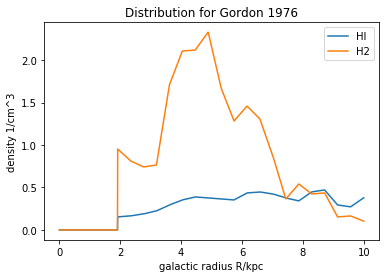

In [19]:
plt.figure()
plt.plot(R,HI,label='HI')
plt.plot(R,H2,label='H2')
plt.legend()
plt.title('Distribution for Gordon 1976')
plt.xlabel('galactic radius R/kpc')
plt.ylabel('density 1/cm^3')
plt.show()